In [12]:
# !pip install pyannote.audio

In [16]:
import torch

emb = torch.hub.load('pyannote/pyannote-audio', 'emb')
print(f'Embedding has dimension {emb.dimension:d}.')

Using cache found in /home/jovyan/.cache/torch/hub/pyannote_pyannote-audio_master


Embedding has dimension 512.


In [ ]:
from pyannote.database import get_protocol, FileFinder

preprocessors = {'audio': FileFinder()}
protocol = get_protocol('VOXCON.SpeakerDiarization.Sample', preprocessors=preprocessors)

# for resource in protocol.test():
#     print(resource["uri"])

Verificar se o test_file está mudando
Estamos obtendo embeddings diferentes (plots) mas todos de mesmo tamanho

In [ ]:
test_file = next(protocol.test())

embeddings = emb(test_file)

chunks = embeddings.sliding_window
print(f'Embeddings were extracted every {1000 * chunks.step:g}ms on {1000 * chunks.duration:g}ms-long windows.')

In [96]:
# sw = SlidingWindow(duration=4, step=1, start=0.0, end=len(embeddings))

# for segment in sw:
#     # "strict" only keeps embedding strictly included in segment
#     x = embeddings.crop(segment, mode='strict')

In [106]:
import numpy as np
from IPython.display import display, clear_output
from pyannote.core import SlidingWindow

X, Y = [], []
length = len(embeddings)
print(length)

for id, embedding in enumerate(embeddings):
    segment = embedding[0]
    x = embedding[1]
    # average speech turn embedding
    X.append(np.nanmean(x, axis=0))

    # keep track of speaker label (for later scatter plot)
    y = test_file['annotation'].argmax(segment)
    Y.append(y)
    clear_output(wait=True)
    display(f'{id+1} {100*(id+1)/length:g}%')

X = np.vstack(X)
_, y_true = np.unique(Y, return_inverse=True)

'66 100%'

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


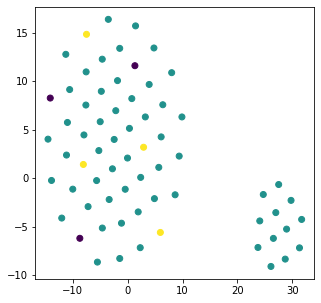

In [107]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, metric="cosine")
X_2d = tsne.fit_transform(X)

# plot 
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
plt.scatter(*X_2d.T, c=y_true)